#### Exercici 1. Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [7]:
import pandas as pd

UEFA_data = pd.read_csv('/Users/juliacorominasfont/Downloads/Lligues europees UEFA.csv', encoding='latin1', sep=';')
UEFA_data.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [20]:
#Test per evaluar si la variable segueix una distribució normal
from scipy.stats import shapiro 
data = UEFA_data['LgRk']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.952, p=0.001
Probably not Gaussian


El p-value és 0.01, inferior a alpha (0.05). Per tant, es rebutja la hipòtesis nul·la, fet que indica que hi ha una evidència signficativa per concloure que la mostra no segueix una distribució normal.

#### Exercici 2. Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [29]:
#Test per evaluar si hi ha una relació lineal entre els atributs
from scipy.stats import pearsonr
data1 = UEFA_data['GF']
data2 = UEFA_data['Pts']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.874, p=0.000
Probably dependent


El p-value és 0.00, inferior a alpha (0.05). Per tant, es rebutja la hipòtesis nul·la, fet que indica que hi ha una evidència signficativa per concloure que hi ha una relació lineal entre els gols a favor i els punts de l'equip a la competició.

#### Exercici 3. Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [37]:
#Test per comparar les distribucions de les variables
from scipy.stats import kruskal
data1 = UEFA_data['GF']
data2 = UEFA_data['GA']
data3 = UEFA_data['xGA']
stat, p = kruskal(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.773, p=0.679
Probably the same distribution


El p-value és 0.679, superior a alpha (0.05). Per tant, no es rebutja la hipòtesis nul·la, fet que indica que hi ha una evidència significativa per concloure que les variables tenen la mateixa distribució.

#### Comprovacions (no forma part de l'exercici)

<Axes: xlabel='LgRk', ylabel='Count'>

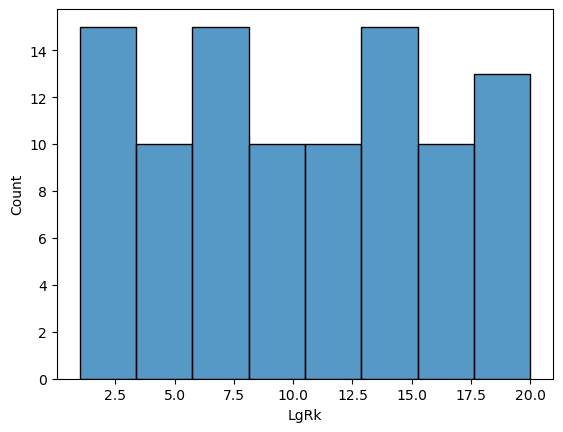

In [33]:
#Exercici 1
import seaborn as sns
sns.histplot(UEFA_data, x='LgRk')

<Axes: xlabel='GF', ylabel='Pts'>

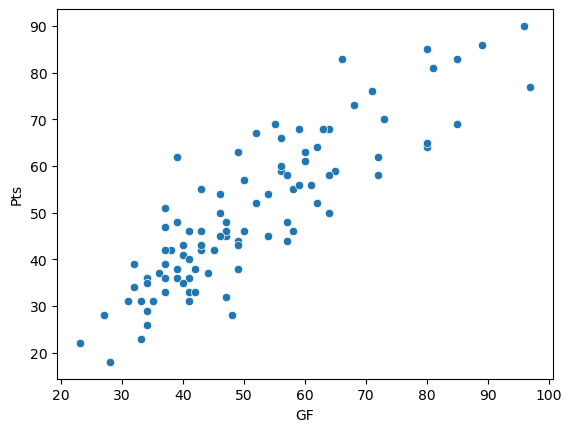

In [34]:
#Exercici 2
sns.scatterplot(UEFA_data, x='GF', y='Pts')

Text(0.5, 1.0, 'Distribució xGA')

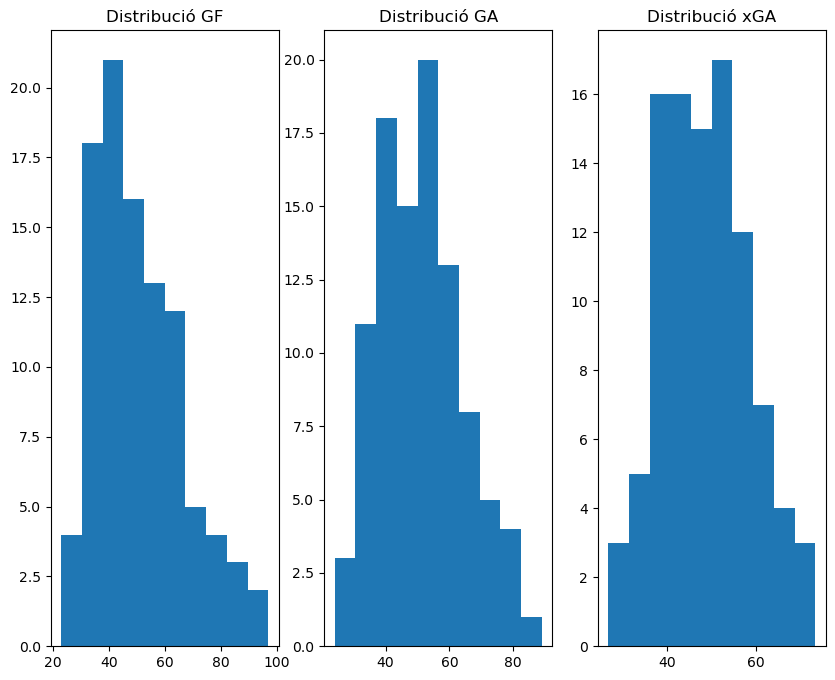

In [40]:
#Exercici 3
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(1, 3, 1)

ax1.hist(UEFA_data['GF'])
plt.title('Distribució GF')

ax2 = fig.add_subplot(1, 3, 2)

ax2.hist(UEFA_data['GA'])
plt.title('Distribució GA')

ax3 = fig.add_subplot(1, 3, 3)

ax3.hist(UEFA_data['xGA'])
plt.title('Distribució xGA')